<a href="https://colab.research.google.com/github/YSCodez/35-APIHunters/blob/main/jobRecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
pip install scikit-learn==0.18.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit-learn-0.18.2.tar.gz (9.2 MB)
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
    Running setup.py install for scikit-learn ... error
  Rolling back uninstall of scikit-learn
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~cikit_learn-1.0.2.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/
   from /usr/local/lib/python3.7/dist-packages/~cikit_learn.libs
  Moving to /usr/local/lib/python3.7/dist-packages/sklearn/
   from /usr/local/lib/python3.7/dist-packages/~klearn
ERROR: Command errored out with exit status 1: /usr

In [67]:
pip install python-rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import pandas as pd
import RAKE
import operator
import re
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,make_scorer,classification_report,accuracy_score
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [77]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
job_input = '/content/drive/MyDrive/Colab Notebooks/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv'
df_job = pd.read_csv(job_input)
df_job.head()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [80]:
df_job.drop('Uniq Id',axis=1, inplace= True)

In [81]:
df_job.drop('Crawl Timestamp',axis=1, inplace= True)
df_job.drop('Job Salary',axis=1, inplace= True)
df_job.drop('Job Experience Required',axis=1, inplace= True)
df_job.drop('Role Category',axis=1, inplace= True)
df_job.drop('Location',axis=1, inplace= True)
df_job.drop('Functional Area',axis=1, inplace= True)
#df_job.drop('Industry',axis=1, inplace= True)

In [82]:
df_job.head()

,Job Title,Key Skills,Industry,Role
0,Digital Media Planner,Media Planning| Digital Media,"Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,"IT-Software, Software Services",Sales Executive/Officer
2,Trainee Research/ Research Executive,Computer science| Fabrication| Quality check|...,"Recruitment, Staffing",R&D Executive
3,Technical Support,Technical Support,"IT-Software, Software Services",Technical Support Engineer
4,Software Test Engineer,manual testing| test engineering| test cases|...,"IT-Software, Software Services",Testing Engineer


In [83]:
df_job.drop_duplicates()
df_job.head(5)

,Job Title,Key Skills,Industry,Role
0,Digital Media Planner,Media Planning| Digital Media,"Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,"IT-Software, Software Services",Sales Executive/Officer
2,Trainee Research/ Research Executive,Computer science| Fabrication| Quality check|...,"Recruitment, Staffing",R&D Executive
3,Technical Support,Technical Support,"IT-Software, Software Services",Technical Support Engineer
4,Software Test Engineer,manual testing| test engineering| test cases|...,"IT-Software, Software Services",Testing Engineer


In [84]:
# check to see if there are any missing values
print(df_job.isnull().values.any())

# as it is true, check number of missing values in each row
df_job.isna().sum() 

True


Job Title      587
Key Skills    1271
Industry       573
Role           901
dtype: int64

In [85]:
# drop all rows that have NaN values
df_job.dropna(inplace=True)

In [86]:
# check for NaN value again
df_job.isna().sum()

Job Title     0
Key Skills    0
Industry      0
Role          0
dtype: int64

In [87]:
jobNotReq = df_job[df_job['Industry'] != ('IT-Software, Software Services' or 'IT-Software/Software Services')].index
df_job.drop(jobNotReq, inplace=True)

In [88]:
df_job["Job Title"].value_counts()[:5]

 PHP Developer        89
 Android Developer    55
 Java Developer       54
 Software Engineer    51
 Dot Net Developer    46
Name: Job Title, dtype: int64

In [89]:
df_job.head(5)

,Job Title,Key Skills,Industry,Role
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,"IT-Software, Software Services",Sales Executive/Officer
3,Technical Support,Technical Support,"IT-Software, Software Services",Technical Support Engineer
4,Software Test Engineer,manual testing| test engineering| test cases|...,"IT-Software, Software Services",Testing Engineer
5,Adobe Analytics Specialist,adobe experience manager| digital| digital ma...,"IT-Software, Software Services",System Analyst
7,Devops Architect,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,"IT-Software, Software Services",Technical Architect


In [90]:
df_job.drop('Industry',axis =1, inplace= True)

In [91]:

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_job['Job Title'].values)
analyze = vectorizer.build_analyzer()
features = vectorizer.get_feature_names()

In [92]:
# within cluster sum of squares
wcss = []
for i in range(1, 15):
  kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter= 600, n_init=1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

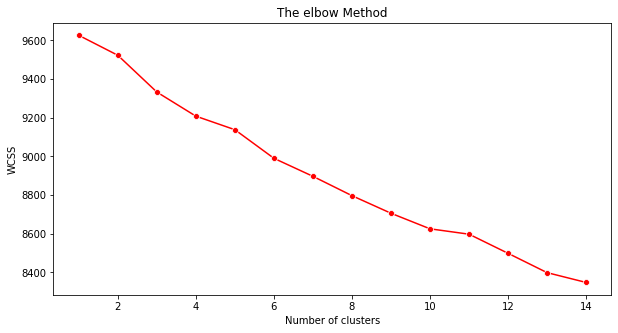

In [93]:
#plotting the graph
plt.figure(figsize=(10,5))
sns.lineplot(range(1,15),wcss,marker= 'o',color='red')
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [94]:
true_k = 13
model = KMeans(n_clusters=true_k, init= 'k-means++', max_iter= 600, n_init=1,random_state = 42)
pred =model.fit_predict(X)
order_centroids= model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

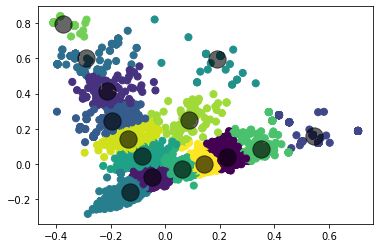

In [95]:
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components = 2)

Y_sklearn = sklearn_pca.fit_transform(X.toarray())
kmeans = KMeans(n_clusters =15, init= 'k-means++', max_iter=600, n_init=1, random_state=42)
fitted =kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c= prediction, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.6);

In [96]:
from sklearn.metrics import silhouette_score
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(X, model.labels_, metric='euclidean')))

KMeans Scaled Silhouette Score: 0.05306325592615184


In [97]:
def get_top_keywords(data, clusters, labels, n_terms):
  df = pd.DataFrame(data.todense()).groupby(clusters).mean()

  for i,r in df.iterrows():
    print('\nCluster {}'.format(i))
    print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

get_top_keywords(X, pred, features, 80)  




Cluster 0
dba,assurance,server,leader,services,big,selenium,trainer,delivery,expert,infrastructure,digital,bangalore,to,coordinator,engineering,scientist,principal,programmer,executives,admin,linux,service,in,with,database,team,sql,engineers,professional,hr,seo,operations,design,web,project,tester,systems,product,oracle,technology,developer,cloud,quality,sap,marketing,solution,head,management,and,testing,application,network,system,security,software,qa,recruiter,automation,content,sr,test,development,java,associate,it,specialist,writer,devops,sales,administrator,support,business,data,senior,technical,architect,lead,analyst,engineer

Cluster 1
ios,analyst,only,engineer,exp,freshers,top,to,stack,executive,hr,ui,client,web,kolkata,full,contract,tester,admin,sales,manager,dotnet,us,yrs,vacancy,joiners,senior,on,angular,and,an,leading,experience,data,oracle,process,testing,c2h,sr,based,bpo,international,recruiter,support,product,at,technical,gurgaon,of,position,sap,lead,software,excellent,c

In [98]:
label = []
for i in df_job['Job Title'].values:

  vec = vectorizer.transform([i])
  pred = model.predict(vec)
  if pred == 0:
    label.append('DataBase Administrator')
  elif pred == 1:
    label.append('UI Developer') 
  elif pred == 2:
    label.append('Cloud Architect')
  elif pred == 3:
    label.append('Full Stack Web Developer')  
  elif pred == 4:
    label.append('Backend Developer')    
  elif pred ==6:
    label.append('IOS/Android Developer')
  elif pred ==7:
    label.append('Devops/Software Engineer') 
  elif pred ==8:
    label.append('Web Designer') 
  elif pred ==9:
    label.append('Technical Support')  
  elif pred ==10:
    label.append('Devops/Software Engineer') 
  else :
    label.append('Full Stack Web Developer') 
    
df_job['Label']= label
df_job.head(5)


,Job Title,Key Skills,Role,Label
1,Online Bidding Executive,pre sales| closing| software knowledge| clien...,Sales Executive/Officer,Full Stack Web Developer
3,Technical Support,Technical Support,Technical Support Engineer,DataBase Administrator
4,Software Test Engineer,manual testing| test engineering| test cases|...,Testing Engineer,Backend Developer
5,Adobe Analytics Specialist,adobe experience manager| digital| digital ma...,System Analyst,DataBase Administrator
7,Devops Architect,TFS| Azure| Git| VSTS| Docker| DynaTrace| Spl...,Technical Architect,DataBase Administrator


In [100]:
jobSkills=[]
for i in df_job['Key Skills']:
  jobSkills.append(i.lower())

Xclass = vectorizer.fit_transform(jobSkills)

X_train,X_test,y_train,y_test = train_test_split(Xclass, label, test_size=0.2, random_state=42)





(7869, 3572)

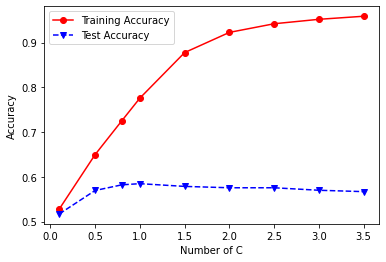

In [101]:
from sklearn.svm import SVC
Csvm =[0.1,0.5,0.8,1,1.5,2,2.5,3,3.5]

trainAcc = []
testAcc = []

for c in Csvm:
  modelsvm = SVC(C=c, gamma =1, kernel= 'rbf')

  svmfit = modelsvm.fit(X_train,y_train)
  Y_predTrain = modelsvm.predict(X_train)
  Y_predTest = modelsvm.predict(X_test)
  trainAcc.append(accuracy_score(y_train, Y_predTrain))
  testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(Csvm, trainAcc, 'ro-',Csvm, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Number of C')
plt.ylabel('Accuracy')
X_train.shape


In [102]:
svm= SVC(C=5, gamma= 1, kernel= 'rbf',probability=True)
svmfit =svm.fit(X_train, y_train)
svm_predictions = svmfit.predict(X_test)
svm_acc =accuracy_score(y_test,svm_predictions)
print("Accuracy of SVM:" + str(svm_acc))
print(classification_report(y_test, svm_predictions))



Accuracy of SVM:0.5665650406504065
                          precision    recall  f1-score   support

       Backend Developer       0.47      0.22      0.30        97
         Cloud Architect       0.55      0.61      0.58        71
  DataBase Administrator       0.58      0.75      0.65       805
Devops/Software Engineer       0.42      0.25      0.32       201
Full Stack Web Developer       0.53      0.52      0.52       488
   IOS/Android Developer       0.74      0.68      0.70        37
       Technical Support       0.84      0.83      0.84        83
            UI Developer       0.27      0.10      0.14       124
            Web Designer       0.80      0.65      0.71        62

                accuracy                           0.57      1968
               macro avg       0.58      0.51      0.53      1968
            weighted avg       0.55      0.57      0.54      1968



In [103]:
#import pickle 
#pickle.dump(svmfit,open('weight.pkl','wb'))
#pickle.load(open("/content/weights.pkl", 'rb'))

In [104]:
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(svm,pickle_out)
pickle_out.close()

In [105]:
loaded_model =pickle.load(open('classifier.pkl','rb'))

In [108]:
userInput = input("Enter your skill:")
pred =vectorizer.transform([userInput.lower()])
output = loaded_model.predict(pred)
print("You may look into "+ output[0]+" jobs")
print("Here is a list of jobs that is under "+ output[0])

cos =[]
labelData= df_job[df_job['Label'] == output[0]]

for index,row in labelData.iterrows():
   skills =[row['Key Skills']]
   skillVec =vectorizer.transform(skills)
   cos_lib = cosine_similarity(skillVec, pred)
   cos.append(cos_lib[0][0])

labelData['cosine_similarity'] = cos

top_5 =labelData.sort_values('cosine_similarity', ascending = False)[['Job Title','Key Skills','Role']]
top_5.head(5)

Enter your skill:java, angularjs
You may look into DataBase Administrator jobs
Here is a list of jobs that is under DataBase Administrator


,Job Title,Key Skills,Role
11501,Java Developement Lead,java| angularjs,Other
16669,Java Fullstack Developer_gurgaon_contract,Java| Angularjs,Software Developer
20863,Java 8 with Angular JS 31 MAY,Java| Angularjs| Javascript| Spring,Software Developer
11622,Full Stack Engineer,spring| java| software development| angularjs...,Software Developer
21345,Core Java - Chennai 3rd Aug Drive,Java,Team Lead/Technical Lead
